<h1 style="text-align:center;">Introdução à Otimização &ndash; Professor Amit Bhaya &ndash; 2020/2</h1>
<h2 style="text-align:center;">Lista 2</h2>
<h2 style="text-align:center;">Entrega: 05 de maio de 2021, 09:55h

### Problema 1 (Folga complementar):

Confere, através da propriedade de folga complementar, para a matriz ${A}$ e os vetores ${b},{c}$ dados abaixo, se o vetor $\check{{x}} = (1,1,1,1,1,1)$ é solução do PL $\max {c}^t {x}$, sujeito a ${Ax}\leq {b}, {x} \geq \mbox{0}$:

$$
{A} = 
\left[\begin{array}{rcrrcr}
1 & 1 & 1 & 1 & 1 & 1\\
1 & 0 & 0 & 0 & 0 & -1\\
-1 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & -1 & 0 & 1\\
0 & 1 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & -1 
\end{array}\right] ,\; 
{b} = \left[\begin{array}{c}10\\0\\1\\0\\1\\0\end{array}\right], \;{c} = \left[\begin{array}{r}2\\2\\1\\0\\4\\-2\end{array}\right].
$$

Sabe-se que para uma dada variável, ou ela possui folga, ou tem seu valor igual a 0.

Logo, se fizermos Ax = b para o vetor solução de 1, obtemos:

$$
\left[\begin{array}{c}
6 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 
\end{array}\right]
$$

Assim, dado vetor solução b, tem-se folga nas variáveis duais $\lambda_{1}$, $\lambda_{3}$ e $\lambda_{5}$. Por definição, elas terão resultado igual a zero.

Seja o dual dado por:

$$
\min{b^{T}\lambda}\\ 
\mbox{s.a.}~ \lambda \geq 0\\
A^{T}\lambda = c
$$

Por definição, o ponto ótimo precisa ser o mesmo, logo:

$$
c^{T}x = 7 = b^{T}\lambda
$$

mas $b^{T}\lambda = 0$. Como $0 = 7$ é falso, segue que $[1,1,1,1,1,1]^T$ não é solução ótima.

### Problema 2 (LP dual):

Considere o problema mini-max

$$
\min_{{x}\in \mathbb{R}^n} \max_{i=1,2,\ldots,m} \{{a}_i^T {x} - b_i \}
$$
sendo que ${a}_i \in \mathbb{R}^n$ e $b_i \in \mathbb{R}$, para $i = 1,2, \ldots, m$. Formule este problema como um PL equivalente e **escreva o dual do PL formulado**.

### Problema 3 (Locadora de veículos)

Uma pequena locadora de carros possui uma frota de 94 veículos distribuídos em 10 agências. A localização de cada agência é dada pelas coordenadas geográficas $x$ e $y$ em uma malha (em km). Podemos supor que a distância pela estrada entre agências é $1.3$ vezes a distância Euclideana entre elas. A tabela abaixo fornece as coordenadas de todas as agências, bem como a demanda dos carros na manhã do dia seguinte, e o estoque de carros disponíveis no final do dia atual.

| Número da agência | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10|
|---------------|---|---|---|---|---|---|---|---|---|---|
| coordenada x |	0 |	20 | 18 | 30 | 35 |	33 | 5 | 5 | 11 | 2 |
| coordenada y |	0 |	20 | 10 | 12 | 0 | 25 |	27 | 10 | 0 | 15 |
| Demanda de carros | 10 | 6 | 8 | 11 | 9 | 7 | 15 |	7 |	9 |	12 |
| Carros disponíveis |	8 |	13 | 4 | 8 | 12 | 2 | 14 | 11 |	15 | 7 |

Supondo o custo de deslocar um carro igual a R\$0.50 por km, determine os movimentos (deslocamentos) dos carros que permitiriam a locadora a preencher a demanda em todas as agências, minimizando o custo total. 


In [5]:
using JuMP, LinearAlgebra
using Cbc
m = Model(with_optimizer(Cbc.Optimizer,LogLevel=0))
position = [0 0; 20 20; 18 10; 30 12; 35 0; 33 25; 5 27; 5 10; 11 0; 2 15]
present = [8; 13; 4; 8; 12; 2; 14; 11; 15; 7]
required = [10; 6; 8; 11; 9; 7; 15; 7; 9; 12]
dist = zeros(10,10)

for i = 1 : 10
    for j = 1 : 10
        dist[i,j] = 1.3 * norm(position[i,:]-position[j,:])
    end
end

#m = Model()

#assume flow[i,j] is the #cars sent from agency i to agency j
@variable(m, flow[1:10,1:10] >= 0, Int)

for i = 1 : 10
    @constraint(m, sum(flow[i,:]) == present[i]) # send to other plcaes
    @constraint(m, sum(flow[:,i]) == required[i])# receive from other places
end

@objective(m, Min, 0.5*sum( flow[i,j]*dist[i,j] for i=1:10, j=1:10))

optimize!(m)

println("The minimum cost for transportation is: \$",JuMP.objective_value(m))
println("The transportation matrix is:")
sleep(.5)
display(Array{Int64}(JuMP.value.(flow)))

The minimum cost for transportation is: $152.63901632295628
The transportation matrix is:


10×10 Array{Int64,2}:
 8  0  0  0  0  0   0  0  0  0
 0  6  1  0  0  5   1  0  0  0
 0  0  4  0  0  0   0  0  0  0
 0  0  0  8  0  0   0  0  0  0
 0  0  0  3  9  0   0  0  0  0
 0  0  0  0  0  2   0  0  0  0
 0  0  0  0  0  0  14  0  0  0
 0  0  0  0  0  0   0  6  0  5
 2  0  3  0  0  0   0  1  9  0
 0  0  0  0  0  0   0  0  0  7

Welcome to the CBC MILP Solver 
Version: 2.9.9 
Build Date: Dec 31 2018 

command line - Cbc_C_Interface -LogLevel 0 -solve -quit (default strategy 1)


### Problema 4 (Modelos de entrada-saída)
Existem muitas maneiras de modelar a relação entre uma sequência de entradas $\{u_1, u_2,\dots\}$ e as saídas corerspondentes $\{y_1, y_2,\dots\}$. Na aula, vimos o exemplo do modelo média móvel (moving average, MA), no qual cada saída é aproximada por uma combinação linear das $k$ entradas mais recentes:
$$ \text{MA:}\quad y_t \approx b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

Formulado este modelo MA, utilizamos mínimos quadrados para determinar os coeficientes $b_1,\dots, b_k$. 

E se não tivéssemos acesso às entradas e, ainda assim, quiséssemos prever valores futuros de $y$ baseado apenas nos seus valores passados?  Uma maneira de fazer isso é pela utilização de um modelo autoregressivo (AR), no qual cada saída é estimada utilizando uma combinação linear das  $\ell$ saídas mais recentes (excluindo a saída atual):
$$ \text{AR:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} $$

Evidentemente, se as entradas contem informação pertinente, não devemos esperar que o método AR tenha um desempenho superior ao do método MA.

a) Utilizando os dados fornecidos (uy_data.csv), plote o $y$ verdadeiro, e no mesmo gráfico, plote também as saídas estimadas ${\hat y}_{AR}$ e ${\hat y}_{MA}$, obtidas utilizando os modelos AR e MA. Utilize $k = 5$ para ambos modelos. Para quantificar a diferença entre estimativas, compute $\|y - {\hat y}_{\alpha}\|$, $\alpha =$ AR, MA, para ambos os casos.

b) Um terceiro tipo de modelo combina tanto AR quanto MA e, evidentemente, se chama modelo ARMA:
$$ \text{ARMA:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} + b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

Estime a saída a partir dos dados $u,y$ de novo, desta vez utilizando um modelo ARMA, com $k = \ell = 1$. Plote $y$ and ${\hat y}_{ARMA}$ juntos, e compute também o erro $\|y - {\hat y}_{ARMA}\|$.

Utilize este trecho de código para carregar o arquivo de dados uy_data.csv e gravar em vetores $u$ e $y$:

using CSV

raw = CSV.read("uy_data.csv");

u = raw[:,1];

y = raw[:,2];

T = length(u)

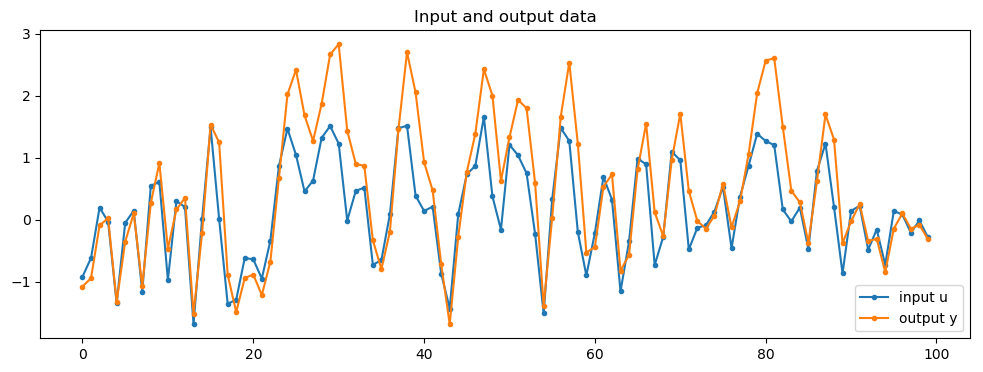

In [7]:
using CSV
raw = CSV.read("uy_data.csv");
u = raw[:,1];
y = raw[:,2];
T = length(u)

raw = [-0.9188 -1.0773
-0.6159 -0.9419
0.1959 -0.0915
-0.0316 0.0245
-1.3455 -1.3239
-0.0513 -0.3536
0.1471 0.1032
-1.1615 -1.0702
0.5478 0.2722
0.6096 0.9127
-0.9706 -0.4672
0.3018 0.1654
0.2039 0.3515
-1.6833 -1.5158
0.0057 -0.2207
1.4925 1.5337
0.0113 1.2458
-1.3563 -0.8868
-1.288 -1.488
-0.6159 -0.9394
-0.639 -0.884
-0.9488 -1.2152
-0.3364 -0.6755
0.8631 0.6695
1.4679 2.0192
1.0442 2.4178
0.4562 1.6812
0.6309 1.2713
1.3197 1.8668
1.5108 2.6653
1.2262 2.8286
-0.0127 1.4358
0.4645 0.8995
0.5191 0.8685
-0.7274 -0.3292
-0.6509 -0.7965
0.0901 -0.1906
1.4747 1.4607
1.5163 2.7007
0.3898 2.0539
0.1405 0.9278
0.2109 0.4734
-0.8675 -0.7146
-1.4313 -1.6855
0.0905 -0.2711
0.7334 0.7681
0.8687 1.3874
1.658 2.4258
0.3784 2.0024
-0.1594 0.6279
1.2091 1.3279
1.0389 1.9324
0.7494 1.7987
-0.229 0.5894
-1.5111 -1.3858
0.3298 0.0347
1.481 1.6587
1.2702 2.5347
-0.1956 1.2286
-0.8984 -0.53
-0.2123 -0.4387
0.6902 0.5329
0.3256 0.7312
-1.1566 -0.823
-0.349 -0.5661
0.9869 0.8105
0.892 1.5486
-0.7315 0.1209
-0.2765 -0.2639
1.0961 0.9674
0.959 1.7094
-0.4793 0.4625
-0.129 -0.0227
-0.0896 -0.1439
0.1326 0.0645
0.5292 0.5793
-0.4606 -0.1214
0.3742 0.298
0.8715 1.0606
1.3862 2.0386
1.2687 2.5662
1.203 2.6041
0.166 1.5009
-0.0269 0.4687
0.1963 0.2807
-0.4706 -0.3694
0.7855 0.617
1.2281 1.6969
0.205 1.2934
-0.8645 -0.3791
0.1419 -0.0276
0.2251 0.2533
-0.4831 -0.3436
-0.1577 -0.3082
-0.7281 -0.8429
0.1397 -0.1449
0.0851 0.1008
-0.2105 -0.1442
-0.011 -0.0843
-0.2845 -0.3122]

u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
PyPlot.svg(true)

figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");
title("Input and output data");

The norm of the error using MA is: 2.460854388269911


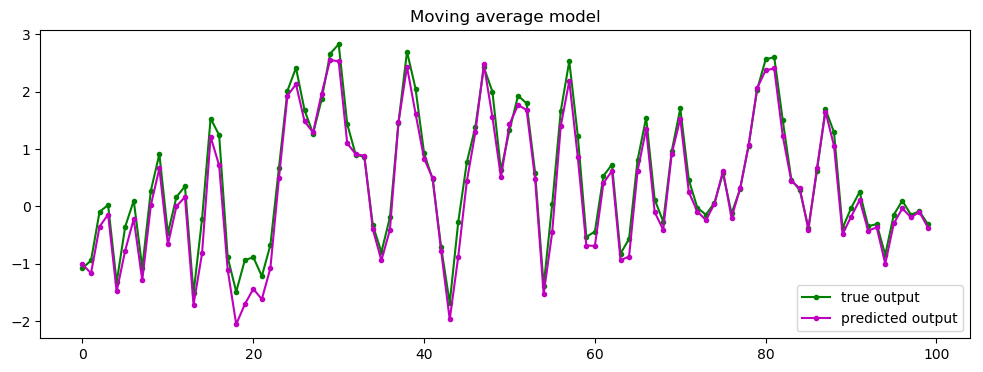

In [8]:
# generate A matrix. Using more width creates better fit.  (MA model)
width = 5
A = zeros(T,width)
for i = 1:width
    A[i:end,i] = u[1:end-i+1]
end
wopt = A\y
yest = A*wopt

println("The norm of the error using MA is: ",norm(yest-y))
sleep(.5)
figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Moving average model");

The norm of the error using AR is: 7.436691765656793


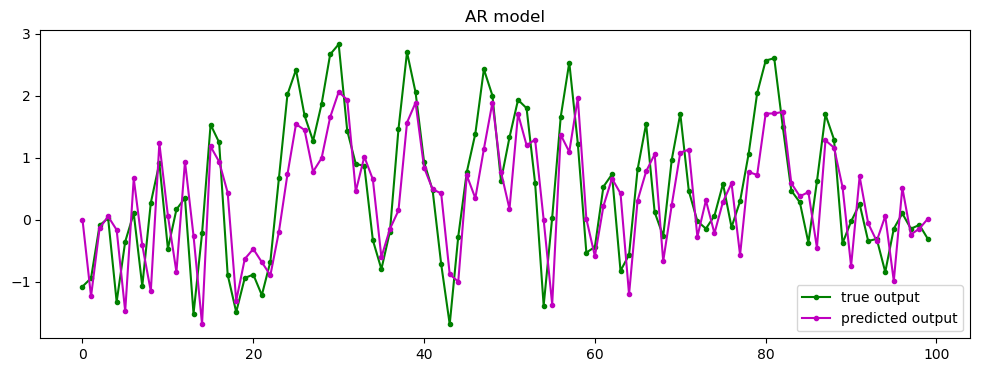

In [9]:
# generate A matrix. Using more width creates better fit.  (AR model)
width = 5
A = zeros(T,width)
for i = 1:width
    A[i+1:end,i] = y[1:end-i]
end
wopt = A\y
yest = A*wopt

println("The norm of the error using AR is: ",norm(yest-y))
sleep(.5)
figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("AR model");

The norm of the error using ARMA is: 1.8565828148734604


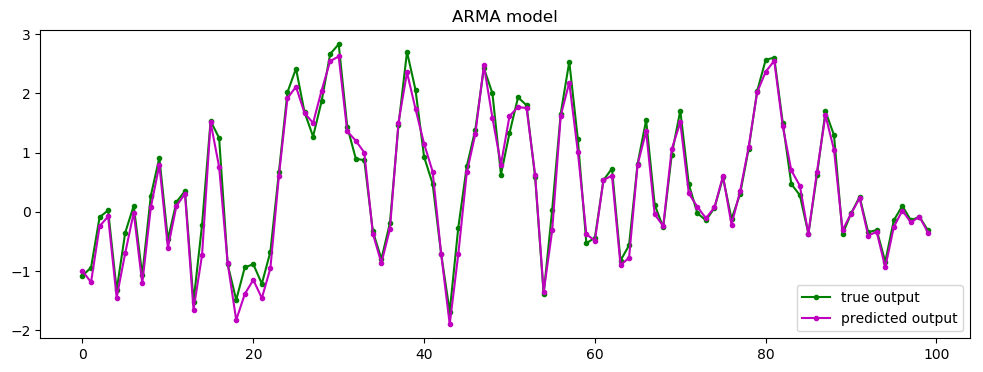

In [10]:
# generate A matrix. Using more width creates better fit.  (ARMA model)
w1 = 1; w2 = 1;
A = zeros(T,w1+w2)
for i = 1:w1
    A[i:end,i] = u[1:end-i+1]
end
for i = 1:w2
    A[i+1:end,w1+i] = y[1:end-i]
end
wopt = A\y
yest = A*wopt

println("The norm of the error using ARMA is: ",norm(yest-y))
sleep(.5)
figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("ARMA model");

### Problema 5 (Ajuste de polinômios e splines)
Estamos na bancada realizando experimentos para avaliar as propriedades de um novo material fluorescente. Na medida que a intensidade do feixe de luz incidindo no material varia, o material deve fluorescer com intensidades diferentes. Infelizmente, o material não é perfeitamente homogêneo e nossa maneira de medir fluorescência não é muito preciso. Depois de testar 200 intensidades diferentes, foi obtido o conjunto de dados xy_data.csv. As intensidades incidentes $x_i$ e as fluorescências resultantes $y_i$ aparecem na primeira e segunda coluna da matriz de dados, respetivamente.

O material possui propriedades nãolineares interessantes e gostaríamos de caracterizar a relaçoa entre intensidade e fluorescência através de um modelo aproximado bem ajustado aos dados experimentais. Embora os dados sejam ruidosos, a física nos ensina que a fluorescência tem que ser nula quando a intensidade é nula, e isso deve ser respeitada por qualquer modelo postulado.

a) *Ajuste polinomial*. Encontre o melhor polinomial cúbico que se ajusta aos dados. Ou seja, encontre uma função da forma $y=a_1x^3+a_2x^2+a_3x+a_4$ que melhor se ajusta aos dados, lembrando do detalhe de zero fluorescência quando a intensidade é nula. Plote os dados reais no mesmo gráfico da curva cúbica de melhor ajuste que você computou.

b) *Ajuste Spline*. Ao invés de utilizar um único polinomial cúbico, podemos utilizar dois polinômios quadráticos. Especificamente, queremos encontrar coeficientes $p_i$ and $q_i$ tais que os dados reais sejam bem modelados pela função quadrática por pedaços dada por:
$$y = \left\{
        \begin{array}{c}
            p_1 x^2 + p_2 x + p_3, \quad \mbox{se}~ 0 \leq x < 4 \\
            q_1 x^2 + q_2 x + q_3, \quad \mbox{se}~ 4 \leq x < 10
        \end{array}
    \right.$$
Estas funções quadráticas tem que ser ajustadas de modo que:

- há fluorescência zero quando a intensidade é zero.
- ambos os pedaços quadráticos tem a mesma inclinação no ponto de 'costura' $x=4$.

Em outras palavras, procura-se uma função quadrática por pedaços e suave, melhor conhecida como **spline** (esta é aapenas uma das muitas possibilidades de função spline). Como sempre, plote os dados reais junto com a curva de melhor ajuste.

### Solução do problema 5

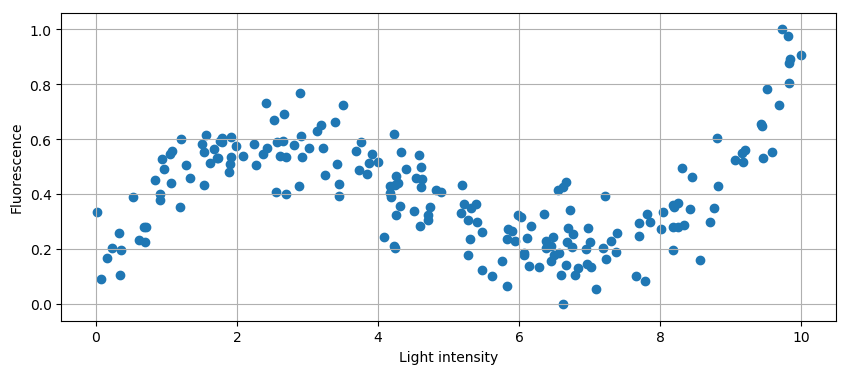

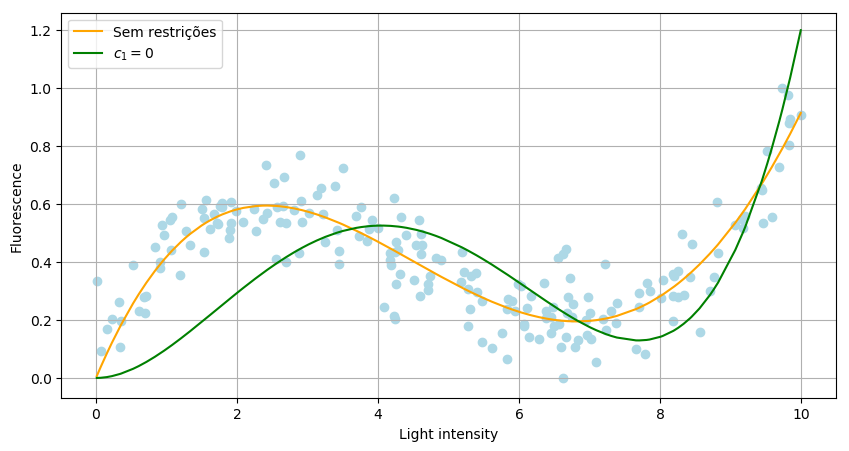

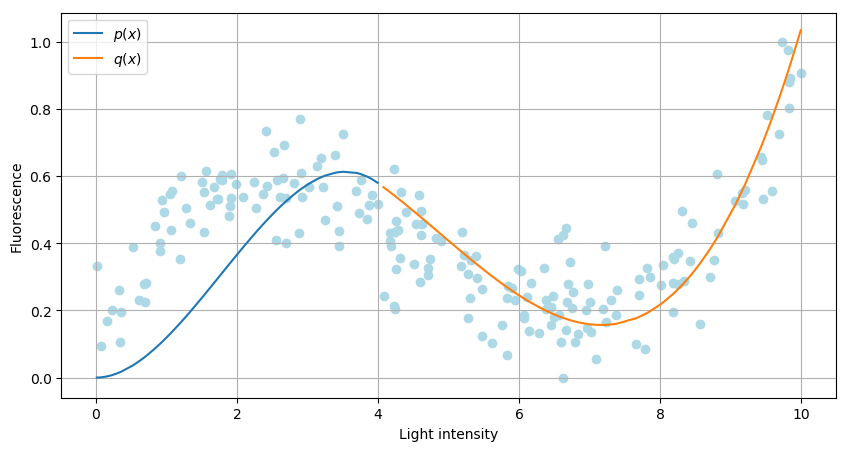

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        1
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [20]:
using JuMP, Ipopt, LinearAlgebra, PyPlot
dados = CSV.read("xy_data.csv",header=0)
xs = dados[1]
ys = dados[2]


figure(figsize=(10,4))
scatter(xs,ys)
xlabel("Light intensity")
ylabel("Fluorescence")
grid()

#
## Regressão cúbica com restrição

function make_regression_matrix(xs,d)
    
    M = zeros(length(xs),d+1)
    M[1:length(xs),1] = xs
    
    for i in 2:d+1
        M[1:length(xs),i] = M[1:length(xs),i-1] .* xs
    end
    return M
end

# JuMP solution

d = 3
M_cubic = make_regression_matrix(xs,d)

using JuMP
using Ipopt
#
m = Model(with_optimizer(Ipopt.Optimizer))

@variable(m, c[1:d+1])
@objective(m, Min, dot(*(M_cubic,c) - ys[1:200],*(M_cubic,c) - ys[1:200])) 

# Exigindo que o intercepto seja zero (fluorescência tem que ser nula quando a intensidade é nula)
@constraint(m, c[1] == 0)

optimize!(m)
coefs_cubic = JuMP.value.(c)


# Standard solution
coefs_cubic2 = M_cubic \ ys

figure(figsize=(10,5))
scatter(xs,ys, color = :lightblue)
plot(xs,M_cubic * coefs_cubic2, color = :orange, label = "Sem restrições")
plot(xs,M_cubic * coefs_cubic, color = :green, label = "\$c_1  = 0\$")
xlabel("Light intensity")
ylabel("Fluorescence")
legend()
grid()

## Regressão com splines
#

ms = Model(with_optimizer(Ipopt.Optimizer))

M_p = make_regression_matrix(xs[1:76],2)
M_q = make_regression_matrix(xs[77:200],2)

@variable(ms, p[1:3])
@variable(ms, q[1:3])

# O custo será a soma dos residuais respectivos
@objective(ms, Min, dot(*(M_p,p) - ys[1:76],*(M_p,p) - ys[1:76]) + dot(*(M_q,q) - ys[77:200],*(M_q,q) - ys[77:200]))

# As restrições de suavidade e continuidade
@constraint(ms, p[1] + p[2]*4 + p[3]*16 - q[1] - q[2]*4 - q[3]*16 == 0)
@constraint(ms, p[2] + 8*p[3] - q[2] - 8*q[3] == 0)
@constraint(ms, p[1] == 0)        #fluorescência tem que ser nula quando a intensidade é nula

optimize!(ms)

coefs_p = JuMP.value.(p)
coefs_q = JuMP.value.(q)


figure(figsize=(10,5))
scatter(xs,ys,color = :lightblue)
plot(xs[1:76],*(M_p,coefs_p), label = "\$p(x)\$")
plot(xs[77:200],*(M_q,coefs_q), label = "\$q(x)\$")
xlabel("Light intensity")
ylabel("Fluorescence")
legend()
grid()
#